In [1]:
import pandas as pd
student_df=pd.read_csv('u1000.csv')
q_df=pd.read_csv('questions.csv')
print(student_df.head())
print(q_df.head())

       timestamp  solving_id question_id user_answer  elapsed_time
0  1549164018798           1       q8679           a         32000
1  1549164148762           2        q417           a         23000
2  1549164183149           3       q6446           c         31000
3  1549164209425           4        q190           c         23000
4  1549164221679           5       q5384           a          9000
  question_id bundle_id explanation_id correct_answer  part          tags  \
0          q1        b1             e1              b     1   1;2;179;181   
1          q2        b2             e2              a     1      15;2;182   
2          q3        b3             e3              b     1  14;2;179;183   
3          q4        b4             e4              b     1   9;2;179;184   
4          q5        b5             e5              c     1   8;2;179;181   

     deployed_at  
0  1558093217098  
1  1558093219720  
2  1558093222784  
3  1558093225357  
4  1558093228439  


In [2]:
print(len(set(student_df["question_id"])))        # unique in interactions
print(len(set(q_df["question_id"])))           # unique in questions
print(len(set(student_df["question_id"]).intersection(set(q_df["question_id"]))))

1287
13169
1287


In [3]:
df = student_df.merge(q_df, on="question_id", how="left")

In [4]:
df.head()

,timestamp,solving_id,question_id,user_answer,elapsed_time,bundle_id,explanation_id,correct_answer,part,tags,deployed_at
0,1549164018798,1,q8679,a,32000,b6030,e6030,a,5,119,1519106382196
1,1549164148762,2,q417,a,23000,b417,e417,a,2,24;26;183;184,1572412919673
2,1549164183149,3,q6446,c,31000,b4978,e4978,d,5,85,1565337787871
3,1549164209425,4,q190,c,23000,b190,e190,a,1,6;7;181,1514558773989
4,1549164221679,5,q5384,a,9000,b3916,e3916,b,5,71,1571278641806


In [5]:
df["correct"] = (df["user_answer"] == df["correct_answer"]).astype(int)
df = df.sort_values(by=["solving_id", "timestamp"])

eda

Missing Values (%):
user_answer       0.201613
timestamp         0.000000
solving_id        0.000000
question_id       0.000000
elapsed_time      0.000000
bundle_id         0.000000
explanation_id    0.000000
correct_answer    0.000000
part              0.000000
tags              0.000000
deployed_at       0.000000
correct           0.000000
dtype: float64


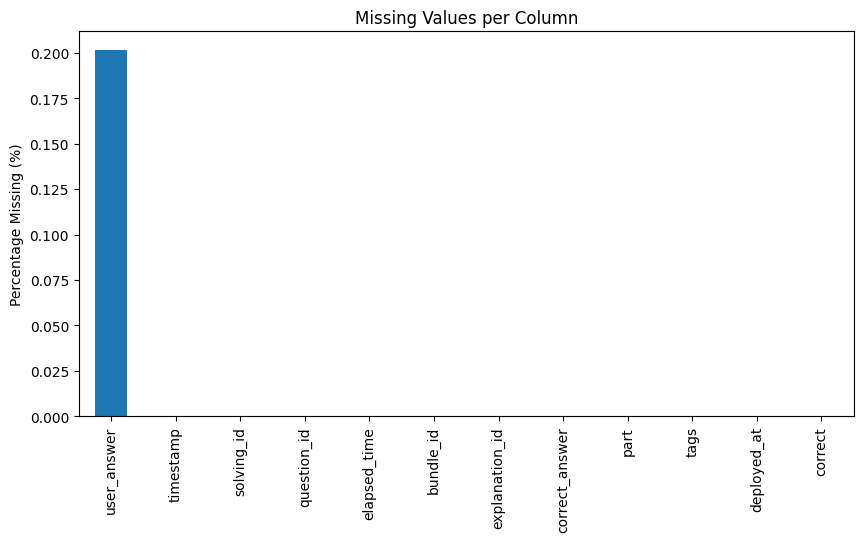

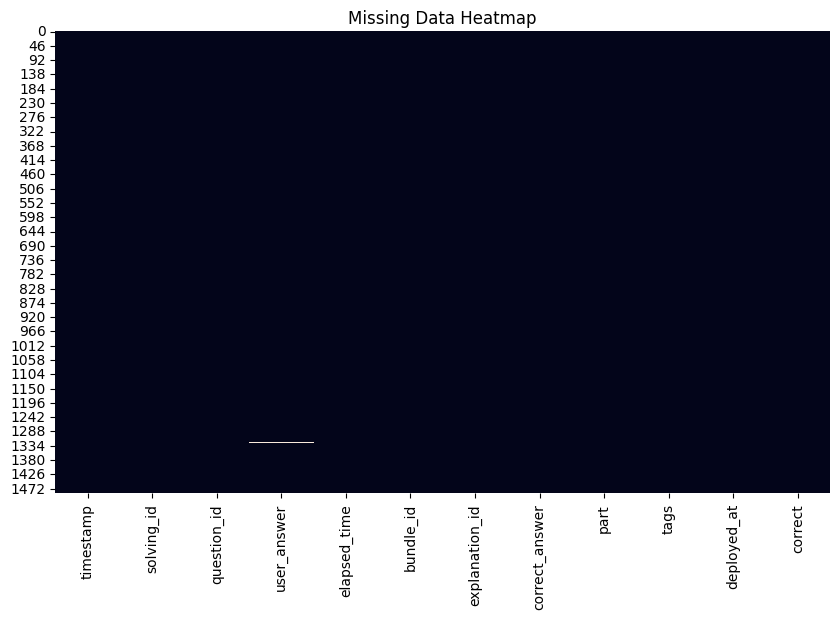

In [6]:
#missing values
import matplotlib.pyplot as plt
import seaborn as sns

missing_pct = df.isna().mean() * 100
print("Missing Values (%):")
print(missing_pct.sort_values(ascending=False)) #prints the percantage of missing values per column

plt.figure(figsize=(10,5))
missing_pct.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Percentage Missing (%)")
plt.title("Missing Values per Column")
plt.show() #we show the bar chart of those missing values

plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show() #we show the heatmap of the pattern of missing data


Summary Statistics for Numerical Columns:


,count,mean,std,min,25%,50%,75%,max
timestamp,1488.0,1.553561e+12,4.979753e+09,1.549164e+12,1.549348e+12,1.551530e+12,1.554095e+12,1.563785e+12
elapsed_time,1488.0,4.112852e+04,2.429754e+04,2.000000e+03,2.400000e+04,3.400000e+04,5.400000e+04,2.250000e+05
correct,1488.0,6.250000e-01,4.842857e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


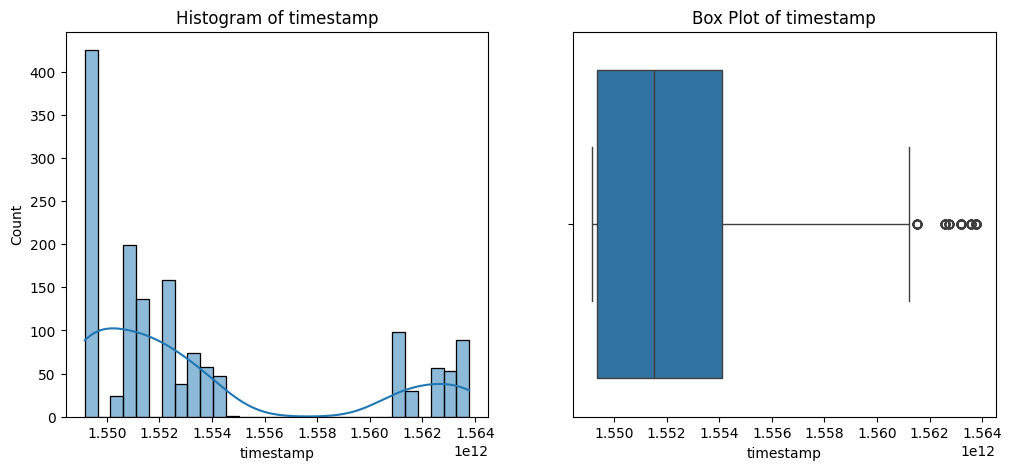

Outliers in timestamp: 229 detected



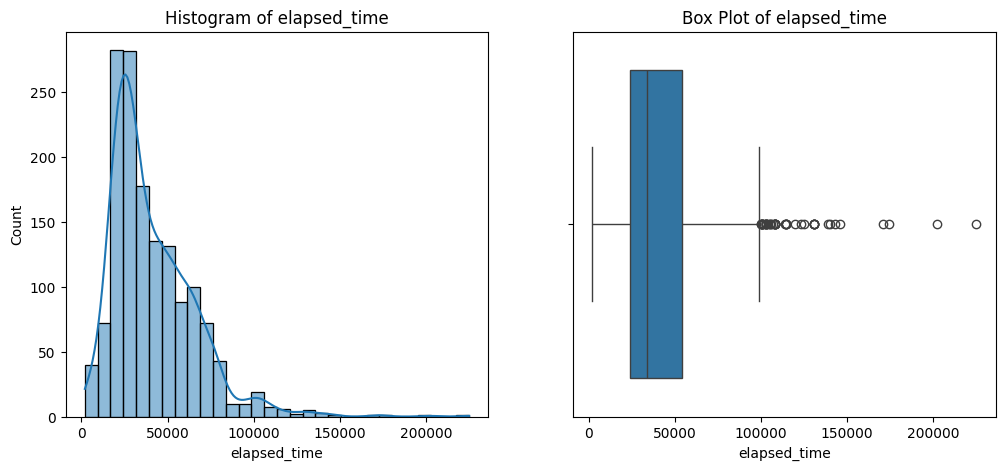

Outliers in elapsed_time: 45 detected



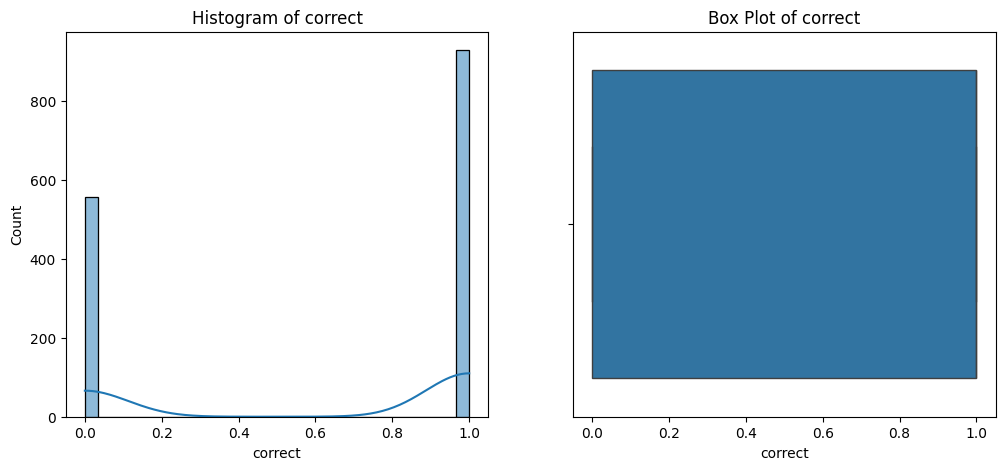

Outliers in correct: 0 detected



In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
exclude_cols = ['solving_id', 'part', 'deployed_at']  # columns you don't want to summarize
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

print("\nSummary Statistics for Numerical Columns:")
display(df[numeric_cols].describe().T) #summary stats

for col in numeric_cols:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")

    plt.show() #distributions

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"Outliers in {col}: {len(outliers)} detected\n") #find outliers using IQR


Column: question_id
question_id
q6565    5
q6567    5
q6568    5
q6566    5
q1063    4
        ..
q1839    1
q1841    1
q1840    1
q1430    1
q5782    1
Name: count, Length: 1287, dtype: int64

Percentages:
question_id
q6565    0.336022
q6567    0.336022
q6568    0.336022
q6566    0.336022
q1063    0.268817
           ...   
q1839    0.067204
q1841    0.067204
q1840    0.067204
q1430    0.067204
q5782    0.067204
Name: proportion, Length: 1287, dtype: float64


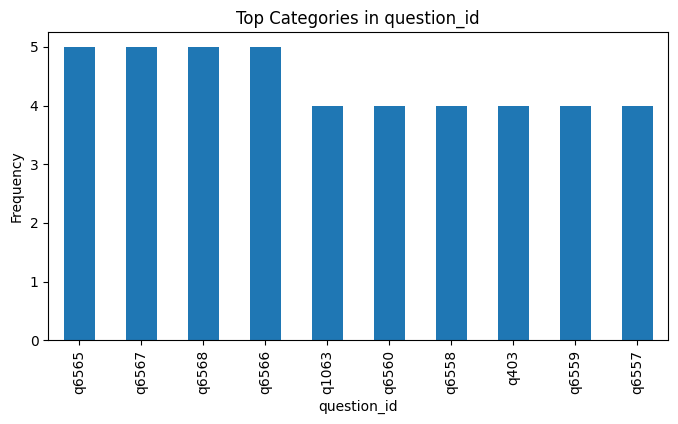


Column: user_answer
user_answer
b      418
a      396
c      378
d      293
NaN      3
Name: count, dtype: int64

Percentages:
user_answer
b      28.091398
a      26.612903
c      25.403226
d      19.690860
NaN     0.201613
Name: proportion, dtype: float64


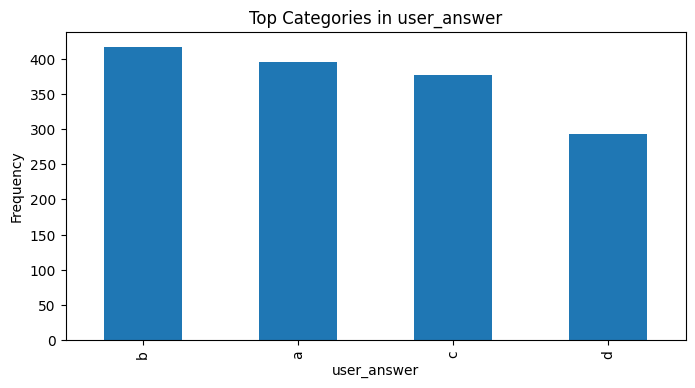


Column: bundle_id
bundle_id
b5088    20
b5086    16
b5172    12
b5113     8
b5206     8
         ..
b812      1
b1180     1
b400      1
b830      1
b6930     1
Name: count, Length: 869, dtype: int64

Percentages:
bundle_id
b5088    1.344086
b5086    1.075269
b5172    0.806452
b5113    0.537634
b5206    0.537634
           ...   
b812     0.067204
b1180    0.067204
b400     0.067204
b830     0.067204
b6930    0.067204
Name: proportion, Length: 869, dtype: float64


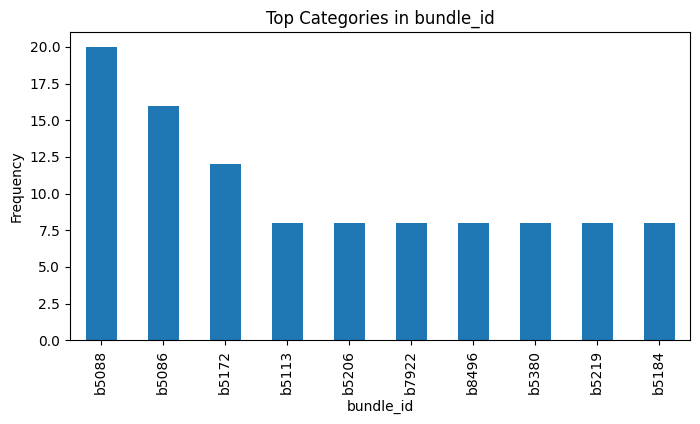


Column: explanation_id
explanation_id
e5088    20
e5086    16
e5172    12
e5113     8
e5206     8
         ..
e812      1
e1180     1
e400      1
e830      1
e6930     1
Name: count, Length: 869, dtype: int64

Percentages:
explanation_id
e5088    1.344086
e5086    1.075269
e5172    0.806452
e5113    0.537634
e5206    0.537634
           ...   
e812     0.067204
e1180    0.067204
e400     0.067204
e830     0.067204
e6930    0.067204
Name: proportion, Length: 869, dtype: float64


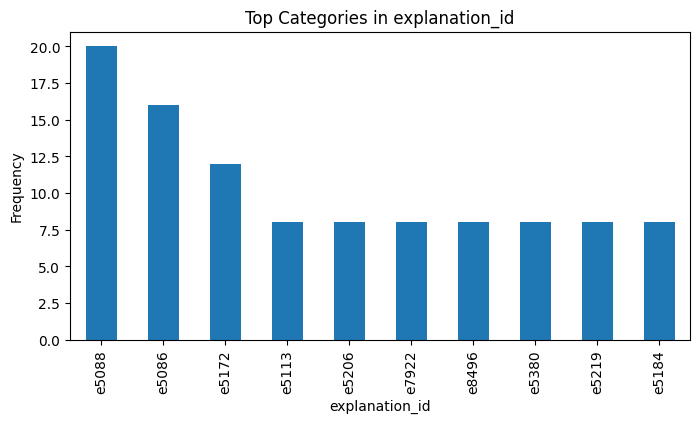


Column: correct_answer
correct_answer
b    421
a    399
c    373
d    295
Name: count, dtype: int64

Percentages:
correct_answer
b    28.293011
a    26.814516
c    25.067204
d    19.825269
Name: proportion, dtype: float64


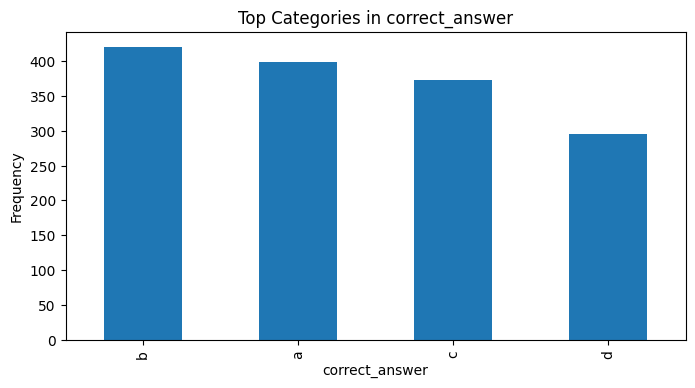


Column: tags
tags
85            47
143           45
76            41
179;143       34
77            31
              ..
60;56;181      1
63;54;182      1
63;52;182      1
63;56;182      1
53;184;183     1
Name: count, Length: 522, dtype: int64

Percentages:
tags
85            3.158602
143           3.024194
76            2.755376
179;143       2.284946
77            2.083333
                ...   
60;56;181     0.067204
63;54;182     0.067204
63;52;182     0.067204
63;56;182     0.067204
53;184;183    0.067204
Name: proportion, Length: 522, dtype: float64


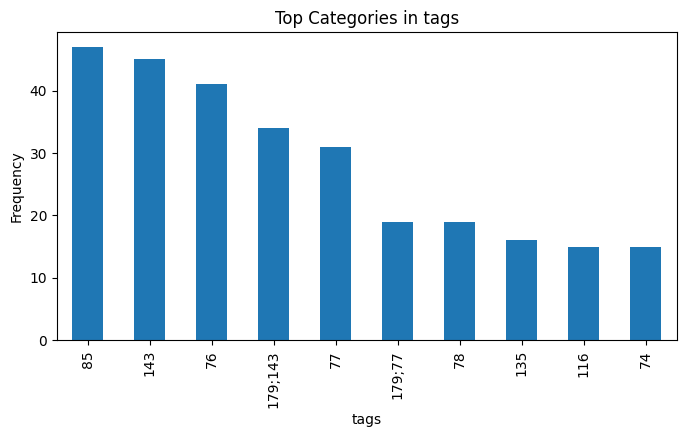

In [8]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns #categorical columns

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts(dropna=False))
    print("\nPercentages:")
    print(df[col].value_counts(normalize=True, dropna=False) * 100)

    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.ylabel("Frequency")
    plt.show()

## RANDOMFOREST

In [9]:
# Create correctness label
df["correct"] = (df["user_answer"] == df["correct_answer"]).astype(int)

# Sort by student + timestamp
df = df.sort_values(by=["solving_id", "timestamp"])

# Create next_correct label
df["next_correct"] = df.groupby("solving_id")["correct"].shift(-1)

# Drop rows where next_correct is NaN
df = df.dropna(subset=["next_correct"])
df["next_correct"] = df["next_correct"].astype(int)

# Attempt number
df["attempt_number"] = df.groupby("solving_id").cumcount() + 1

# Previous correctness
df["prev_correct"] = df.groupby("solving_id")["correct"].shift(1)

# Cumulative correctness
df["cumulative_correct"] = df.groupby("solving_id")["correct"].expanding().mean().shift(1).reset_index(level=0, drop=True)

# Previous elapsed time
df["prev_elapsed"] = df.groupby("solving_id")["elapsed_time"].shift(1)

# Average elapsed time before
df["avg_elapsed_before"] = df.groupby("solving_id")["elapsed_time"].expanding().mean().shift(1).reset_index(level=0, drop=True)

# Time since previous attempt
df["time_since_prev"] = df.groupby("solving_id")["timestamp"].diff()


In [10]:
from sklearn.preprocessing import LabelEncoder

for col in ["question_id", "bundle_id", "explanation_id"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# Split tags and create multi-hot
tags_series = df['tags'].str.split(';')
unique_tags = sorted(set([tag for sublist in tags_series for tag in sublist]))

for tag in unique_tags:
    df[f'tag_{tag}'] = tags_series.apply(lambda x: int(tag in x))

# Features you want to use
features = [
    "attempt_number", "prev_correct", "cumulative_correct",
    "prev_elapsed", "avg_elapsed_before", "time_since_prev",
    "question_id", "bundle_id", "explanation_id"
] + [f'tag_{tag}' for tag in unique_tags]  # if you used tags multi-hot

X = df[features]
y = df["next_correct"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


/tmp/ipython-input-2311099687.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tag_{tag}'] = tags_series.apply(lambda x: int(tag in x))
/tmp/ipython-input-2311099687.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tag_{tag}'] = tags_series.apply(lambda x: int(tag in x))
/tmp/ipython-input-2311099687.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

Accuracy: 0.5436893203883495
ROC-AUC: 0.5258413461538461
              precision    recall  f1-score   support

           0       0.38      0.31      0.34        39
           1       0.62      0.69      0.65        64

    accuracy                           0.54       103
   macro avg       0.50      0.50      0.49       103
weighted avg       0.53      0.54      0.53       103



###BKT

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Prepare dataset ---
df_bkt = df[['solving_id','tags','correct','timestamp']].copy()
df_bkt = df_bkt.dropna(subset=['tags'])
df_bkt['tags'] = df_bkt['tags'].astype(str)
df_bkt = df_bkt.explode('tags')
df_bkt.rename(columns={'solving_id':'user_id','tags':'skill_name','correct':'correct'}, inplace=True)
df_bkt['user_id'] = df_bkt['user_id'].astype(int)
df_bkt['correct'] = df_bkt['correct'].astype(int)
df_bkt['skill_name'] = df_bkt['skill_name'].astype(str)
df_bkt = df_bkt.sort_values(by=['user_id','timestamp'])

# --- Manual BKT parameters ---
T = 0.1  # learning probability
G = 0.2  # guess
S = 0.1  # slip
students = df_bkt['user_id'].unique()
skills = df_bkt['skill_name'].unique()

# Initialize mastery probabilities
mastery = {(s,k): 0.2 for s in students for k in skills}

# --- Compute predicted mastery and next-question correctness ---
pred_mastery = []
pred_next_correct = []

for idx, row in df_bkt.iterrows():
    s, k = row['user_id'], row['skill_name']
    p_known = mastery[(s,k)]

    # Probability next answer is correct
    p_correct = p_known*(1-S) + (1-p_known)*G
    pred_next_correct.append(p_correct)

    # Update mastery based on observed answer
    if row['correct'] == 1:
        p_known = (p_known*(1-S)) / (p_known*(1-S) + (1-p_known)*G)
    else:
        p_known = (p_known*S) / (p_known*S + (1-p_known)*(1-G))

    # Learning after each step
    p_known = p_known + (1-p_known)*T
    mastery[(s,k)] = p_known
    pred_mastery.append(p_known)

df_bkt['pred_mastery'] = pred_mastery
df_bkt['pred_next_correct'] = pred_next_correct


# --- Example: histogram of predicted next-question correctness ---
plt.figure(figsize=(8,5))
sns.histplot(df_bkt['pred_next_correct'], bins=20, kde=True)
plt.title("Predicted Probability of Next Question Being Correct")
plt.xlabel("Predicted Probability")
plt.show()


NameError: name 'df_merged' is not defined

In [23]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# --- Shift actual correctness to next question per student ---
df_bkt['next_correct'] = df_bkt.groupby('user_id')['correct'].shift(-1)

# Drop rows where next_correct is NaN (last question for each student)
df_eval = df_bkt.dropna(subset=['next_correct']).copy()
df_eval['next_correct'] = df_eval['next_correct'].astype(int)

# --- Convert predicted probabilities to binary using 0.5 threshold ---
df_eval['pred_next_correct_label'] = (df_eval['pred_next_correct'] >= 0.5).astype(int)

# --- Compute metrics ---
accuracy = accuracy_score(df_eval['next_correct'], df_eval['pred_next_correct_label'])
roc_auc = roc_auc_score(df_eval['next_correct'], df_eval['pred_next_correct'])
report = classification_report(df_eval['next_correct'], df_eval['pred_next_correct_label'])

print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nClassification Report:\n", report)


Accuracy: 0.377
ROC-AUC: 0.480

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.96      0.53       118
           1       0.58      0.04      0.07       200

    accuracy                           0.38       318
   macro avg       0.48      0.50      0.30       318
weighted avg       0.50      0.38      0.24       318



In [28]:
# BKT parameters
T = 0.1  # learning probability
G = 0.2  # guess
S = 0.1  # slip
L0 = 0.2 # initial mastery

mastery = L0
mastery_probs = []

for idx, row in df.iterrows():
    p_known = mastery

    # probability next answer correct (optional)
    p_correct = p_known*(1-S) + (1-p_known)*G

    # update mastery based on observed answer
    if row['correct'] == 1:
        p_known = (p_known*(1-S)) / (p_known*(1-S) + (1-p_known)*G)
    else:
        p_known = (p_known*S) / (p_known*S + (1-p_known)*(1-G))

    # learning step
    p_known = p_known + (1-p_known)*T
    mastery = p_known
    mastery_probs.append(p_known)

df['pred_mastery'] = mastery_probs


/tmp/ipython-input-1370445740.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['pred_mastery'] = mastery_probs


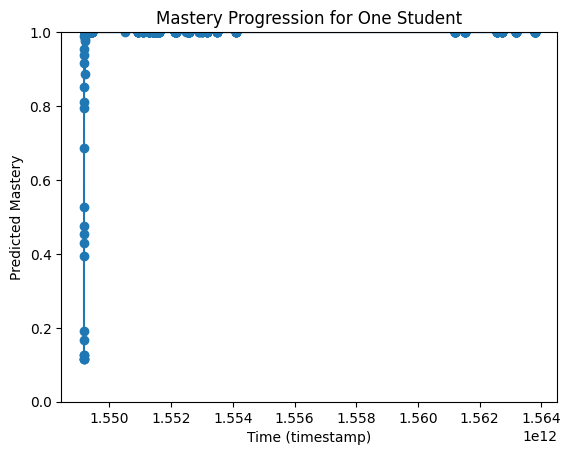

In [29]:
import matplotlib.pyplot as plt

plt.plot(df['timestamp'], df['pred_mastery'], marker='o')
plt.xlabel("Time (timestamp)")
plt.ylabel("Predicted Mastery")
plt.title("Mastery Progression for One Student")
plt.ylim(0,1)
plt.show()


In [30]:
!git clone https://github.com/azroku/Adaptive-Learning-For-HighSchools
%cd Adaptive-Learning-For-HighSchools


Cloning into 'Adaptive-Learning-For-HighSchools'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
/content/Adaptive-Learning-For-HighSchools
